In [1]:
import pandas as pd
import re

In [2]:
# read CSVs
tweets_AAP = pd.read_csv("AAP/AAP.csv")
tweets_INC = pd.read_csv("INC/INC.csv")
tweets_BJP = pd.read_csv("BJP/BJP.csv")
tweets_AITMC = pd.read_csv("AITMC/AITMC.csv")

In [3]:
tweets_AAP = tweets_AAP[['date', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count', 'hashtags']]
tweets_INC = tweets_INC[['date', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count', 'hashtags']]
tweets_BJP = tweets_BJP[['date', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count', 'hashtags']]
tweets_AITMC = tweets_AITMC[['date', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count', 'hashtags']]

In [4]:
print("The shape of AAP tweets: {}".format(tweets_AAP.shape))
print("The shape of INC tweets: {}".format(tweets_INC.shape))
print("The shape of BJP tweets: {}".format(tweets_BJP.shape))
print("The shape of AITMC tweets: {}".format(tweets_AITMC.shape))

The shape of AAP tweets: (2663, 7)
The shape of INC tweets: (5068, 7)
The shape of BJP tweets: (9848, 7)
The shape of AITMC tweets: (1910, 7)


In [5]:
tweets_AAP.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
tweets_INC.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
tweets_BJP.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
tweets_AITMC.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [6]:
# Shpae after dropping NA columns
print("The shape of AAP tweets: {}".format(tweets_AAP.shape))
print("The shape of INC tweets: {}".format(tweets_INC.shape))
print("The shape of BJP tweets: {}".format(tweets_BJP.shape))
print("The shape of AITMC tweets: {}".format(tweets_AITMC.shape))

The shape of AAP tweets: (2663, 7)
The shape of INC tweets: (5031, 7)
The shape of BJP tweets: (9848, 7)
The shape of AITMC tweets: (1910, 7)


In [7]:
tweets_AAP.head()

,date,username,tweet,replies_count,retweets_count,likes_count,hashtags
0,2020-06-29,atishiaap,"As a recovering Covid-positive patient, I have...",458,1702,9849,['plasmabank']
1,2020-06-28,atishiaap,Am a little amused by the entire BJP online br...,106,450,1155,['builtbyaap']
2,2020-06-27,atishiaap,.@ArvindKejriwal gives what is a true tribute ...,5972,1565,6845,[]
3,2020-06-26,atishiaap,Just wanted to let you all know that I’m feeli...,494,673,9990,[]
4,2020-06-21,atishiaap,"Sharing a poem written by a friend, who said t...",29,172,702,[]


In [8]:
AAP_sentiment = pd.read_csv("AAP/AAP_sentiment.csv")
AAP = pd.concat([tweets_AAP, AAP_sentiment], axis=1)
INC_sentiment = pd.read_csv("INC/INC_sentiment.csv")
INC = pd.concat([tweets_INC, INC_sentiment], axis=1)
BJP_sentiment = pd.read_csv("BJP/BJP_sentiment.csv")
BJP = pd.concat([tweets_BJP, BJP_sentiment], axis=1)
AITMC_sentiment = pd.read_csv("AITMC/AITMC_sentiment.csv")
AITMC = pd.concat([tweets_AITMC, AITMC_sentiment], axis=1)

In [9]:
INC.head(5)

,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,neg,neu,pos,compound
0,29-06-2020,priyankagandhi,"... देश की सरज़मीं को गँवा डाले, उस सरकार के ख...",627.0,2513.0,9648.0,[],0.0,1.000,0.000,0.0000
1,29-06-2020,priyankagandhi,जैसे कि मैंने कहा था कि कुछ विपक्ष के नेता भाज...,2471.0,5435.0,19739.0,[],0.0,1.000,0.000,0.0000
2,28-06-2020,priyankagandhi,...कर फैसला लेना चाहिए। विद्यार्थियों का कहना...,202.0,1936.0,5041.0,[],0.0,1.000,0.000,0.0000
3,28-06-2020,priyankagandhi,देश में कोरोना के मामले हर दिन बढ़ रहे हैं ऐसे...,996.0,4512.0,11430.0,[],0.0,1.000,0.000,0.0000
4,28-06-2020,priyankagandhi,..The families of Jairaj and Fenix deserve jus...,133.0,1658.0,5162.0,[],0.0,0.857,0.143,0.6705


In [10]:
INC.shape

(5068, 11)

In [11]:
INC.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [12]:
INC.shape

(4994, 11)

In [13]:
import dateutil
import matplotlib.pyplot as plt
plt.style.use(['science', 'grid'])
import matplotlib
import numpy as np
%matplotlib inline

In [14]:
INC['date'] = INC['date'].apply(dateutil.parser.parse, dayfirst=True)
INC['date'].value_counts()
plot_data = INC.groupby(pd.Grouper(key='date', freq='W')).mean()
plot_data = plot_data.reset_index()
date_objects = plot_data['date'].tolist()
dates = plot_data['date'].dt.strftime('%Y-%m-%d').tolist()
compound = plot_data['compound'].tolist()

In [15]:
#test
replies = plot_data['replies_count'].tolist()

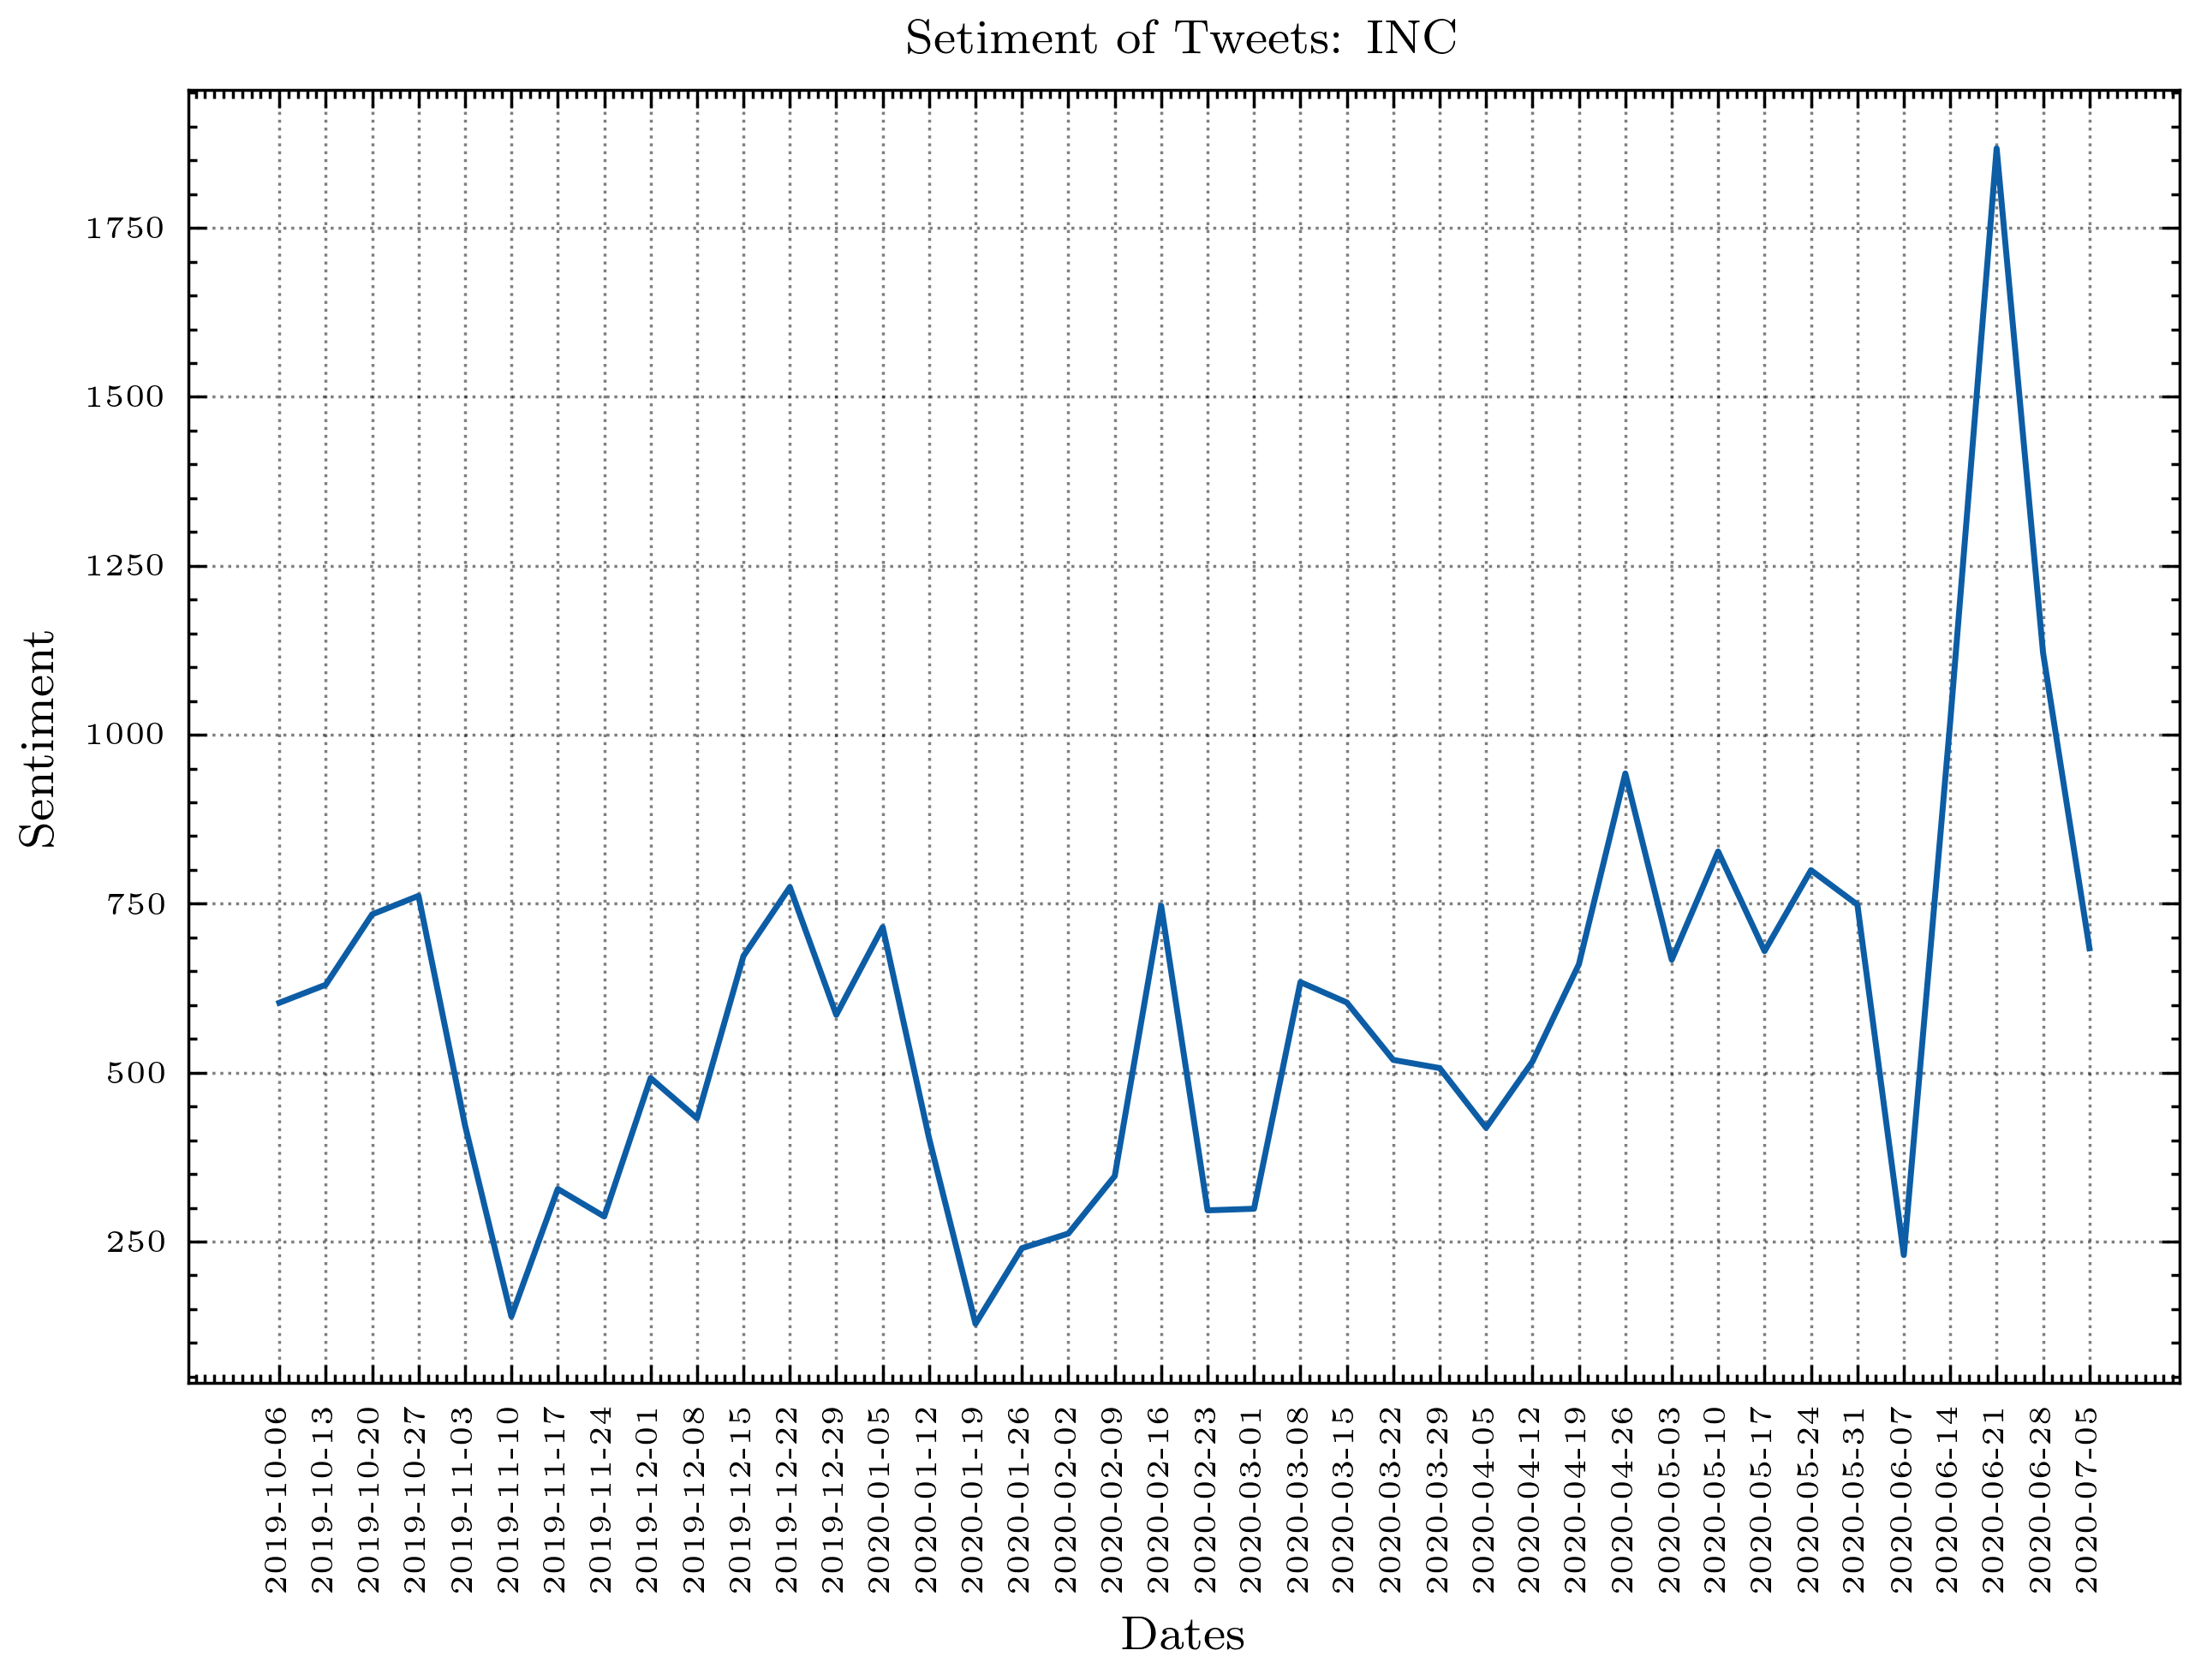

In [16]:
fig = plt.figure(dpi=500)
plt.title('Setiment of Tweets: INC', fontsize=8)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([-0.75,0.75])
plt.xticks(fontsize=5, rotation=90)
plt.yticks(fontsize=5)
plt.xlabel('Dates', fontsize=8)
plt.ylabel('Sentiment', fontsize=8)
plt.plot(dates, replies)
#fig.savefig('INC_replies_count.png')

In [17]:
tweets_AAP['hashtags'].values.tolist()

["['plasmabank']",
 "['builtbyaap']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['takecareak']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['delhifightscorona']",
 "['dillikeheroes']",
 '[]',
 '[]',
 "['eidmubarak']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['delhifightscorona']",
 '[]',
 '[]',
 '[]',
 "['delhifightscorona']",
 '[]',
 '[]',
 '[]',
 "['delhifightscorona']",
 '[]',
 '[]',
 "['delhifightscorona']",
 "['happinessclass']",
 '[]',
 "['delhifightscorona']",
 "['ramadanmubarak']",
 "['delhigovtschools', 'corona']",
 "['worldbookday2020']",
 "['delhifightscorona']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['tablighijamaat']",
 "[

In [18]:
hashtagsBJP = tweets_BJP['hashtags']
from collections import Counter

#print(Counter(hashtagsBJP).keys()) # equals to list(set(words))
#print(Counter(hashtagsBJP).values())

In [19]:
print(AAP['neu'].value_counts())
print(AAP.shape)

1.000    1432
0.545      42
0.239      41
0.385       9
0.738       8
         ... 
0.401       1
0.942       1
0.868       1
0.666       1
0.855       1
Name: neu, Length: 474, dtype: int64
(2663, 11)


In [20]:
print(BJP['neu'].value_counts())
print(BJP.shape)

1.000    4023
0.444     355
0.609     154
0.545     154
0.526      97
         ... 
0.480       1
0.403       1
0.390       1
0.437       1
0.421       1
Name: neu, Length: 567, dtype: int64
(9848, 11)


In [21]:
print(INC['neu'].value_counts())
print(INC.shape)

1.000    3316
0.545      39
0.256      39
0.444      36
0.549      35
         ... 
0.669       1
0.910       1
0.510       1
0.373       1
0.727       1
Name: neu, Length: 445, dtype: int64
(4994, 11)


In [22]:
print(AITMC['neu'].value_counts())
print(AITMC.shape)

1.000    562
0.811     11
0.897     11
0.667     10
0.833     10
        ... 
0.806      1
0.495      1
0.197      1
0.536      1
0.529      1
Name: neu, Length: 441, dtype: int64
(1910, 11)


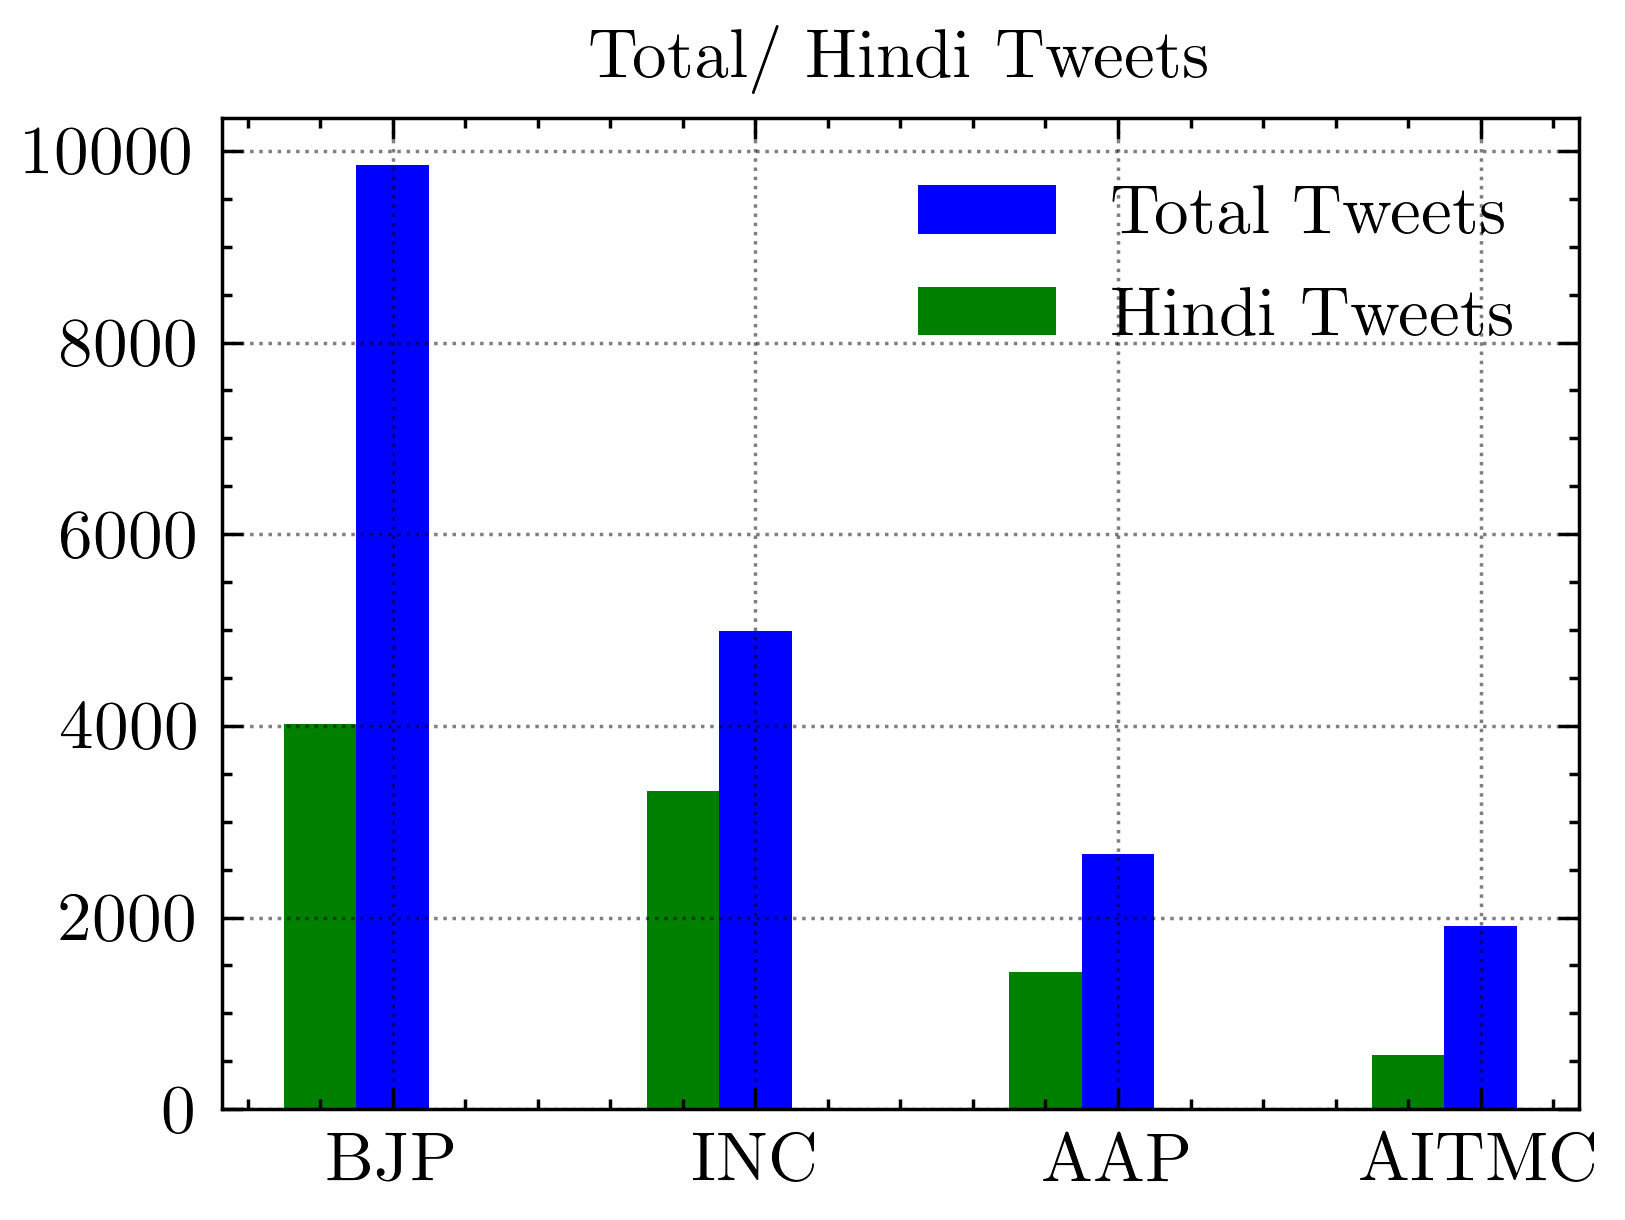

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science'])

#sample data
accuracy_pre = {"BJP": 9848, "INC": 4994, "AAP": 2663, "AITMC": 1910}
accuracy_post = {"BJP": 4023, "INC": 3316, "AAP": 1432, "AITMC": 562}
fig = plt.figure(dpi=500)

X = np.arange(len(accuracy_pre))
ax = plt.subplot(111)
ax.bar(X, accuracy_pre.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, accuracy_post.values(), width=0.2, color='g', align='center')
ax.legend(('Total Tweets','Hindi Tweets'))
plt.xticks(X, accuracy_pre.keys())
plt.title("Total/ Hindi Tweets", fontsize=10)
plt.show()
#fig.savefig('hindi_vs_total_tweets.png')